# Assignment A02.1 Average degree of the nearest neighbours
*This assignment is done by **HyeongKyun Kim** and **SongYi Han** - We both **equally contributed** to this work by writing our own code individually first and then compare/merge them together.*

*Task: For each dataset G, randomize it to obtain network G_rnd and explore their assortativity properties.*

1. Plot the average degree of the nearest neighbours *k_nn(k)* as a function of the vertices degree *k* 
2. Compute the assortativity coefficient of the real network
3. compute the assortativity coefficient of the randomised neetwork

**[Dataset]**

1. graph_celegansInteractomes
2. graph_AstroPh
3. graph_CondMat
4. graph_chess
5. graph_dolphins
6. graph_eu_airlines
7. graph_facebook
8. graph_florentine_families
9. graph_game_thrones
10. graph_internet
11. graph_jazz_collab
12. graph_terrorists

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


## Define the data and variables.

In [2]:
g_cele = nx.read_gml('data/graph_celegansInteractomes.gml')
g_astro = nx.read_gml('data/graph_AstroPh.gml')
g_condm = nx.read_gml('data/graph_CondMat.gml')
g_chess = nx.read_gml('data/graph_chess.gml')
g_dolp = nx.read_gml('data/graph_dolphins.gml')
g_air = nx.read_gml('data/graph_eu_airlines.gml')
g_faceb = nx.read_gml('data/graph_facebook.gml')
g_flofam = nx.read_gml('data/graph_florentine_families.gml')
g_gmthr = nx.read_gml('data/graph_game_thrones.gml')
g_intnt = nx.read_gml('data/graph_internet.gml')
g_jazzc = nx.read_gml('data/graph_jazz_collab.gml')
g_terrs = nx.read_gml('data/graph_terrorists.gml')

g_cele_rnd = nx.read_gml('data_random/graph_celegansInteractomes_random.gml')
g_astro_rnd = nx.read_gml('data_random/graph_AstroPh_random.gml')
g_condm_rnd = nx.read_gml('data_random/graph_CondMat_random.gml')
g_chess_rnd = nx.read_gml('data_random/graph_chess_random.gml')
g_dolp_rnd = nx.read_gml('data_random/graph_dolphins_random.gml')
g_air_rnd = nx.read_gml('data_random/graph_eu_airlines_random.gml')
g_faceb_rnd = nx.read_gml('data_random/graph_facebook_random.gml')
g_flofam_rnd = nx.read_gml('data_random/graph_florentine_families_random.gml')
g_gmthr_rnd = nx.read_gml('data_random/graph_game_thrones_random.gml')
g_intnt_rnd = nx.read_gml('data_random/graph_internet_random.gml')
g_jazzc_rnd = nx.read_gml('data_random/graph_jazz_collab_random.gml')
g_terrs_rnd = nx.read_gml('data_random/graph_terrorists_random.gml')


real_g = [ g_cele, g_astro, g_condm,
g_chess, g_dolp, g_air, g_faceb, g_flofam,
g_gmthr, g_intnt, g_jazzc, g_terrs
]

rnd_g = [ g_cele_rnd, g_astro_rnd, g_condm_rnd,
g_chess_rnd, g_dolp_rnd, g_air_rnd, g_faceb_rnd, g_flofam_rnd,
g_gmthr_rnd, g_intnt_rnd, g_jazzc_rnd, g_terrs_rnd
]

g_name = [
    'graph_celegansInteractomes', 'graph_AstroPh', 'graph_CondMat', 'graph_chess', 
    'graph_dolphins', 'graph_eu_airlines', 'graph_facebook', 'graph_florentine_families',
    'graph_game_thrones', 'graph_internet', 'graph_jazz_collab', 'graph_terrorists'
]



## ===== *ANSWER* =====

In [3]:
# Define for the calculation of the assortativity coefficient of the graph.
def assrt_list(g_list):
    _ = [None] * 12
    i = 0

    for g in g_list:
        assrt_g_cele = nx.degree_assortativity_coefficient(g)
        _[i] = assrt_g_cele
        i += 1

    return _

# Calculate both real data and randomized data.
assrt_list_real = assrt_list(real_g)
assrt_list_rnd = assrt_list(rnd_g)

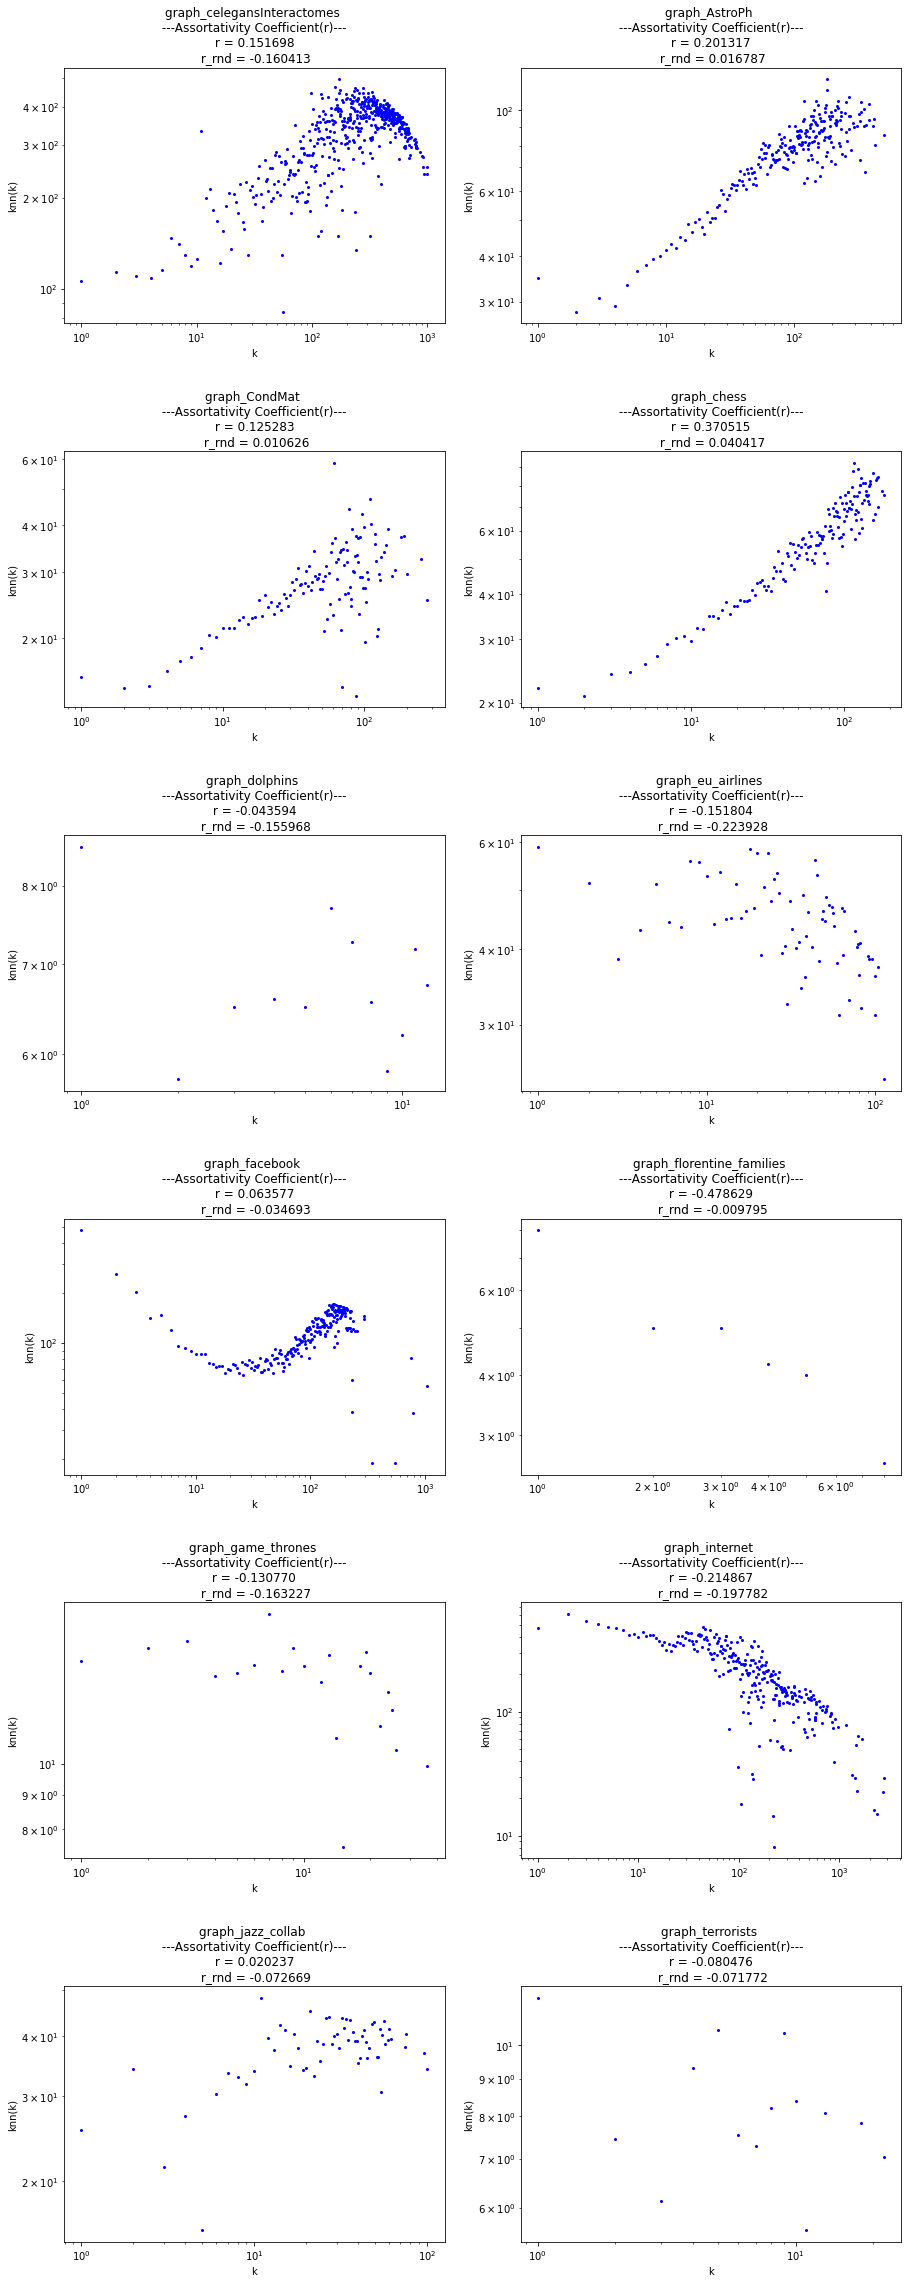

In [5]:
fig, axs = plt.subplots(6, 2, figsize=(15,40))

k = 0

for i in range(6):
    for j in range(2):
        knn_k_dict = nx.average_degree_connectivity(real_g[k])

        k_arr = list(knn_k_dict.keys())
        knn_arr = list(knn_k_dict.values())
        
        axs[i,j].plot(k_arr,knn_arr, 'bo', markersize=2)
        
        name = g_name[k]
        assrt_real = assrt_list_real[k]
        assrt_rnd = assrt_list_rnd[k]
        
        axs[i,j].set_title('%s \n ---Assortativity Coefficient(r)--- \n r = %f \n r_rnd = %f' %(name, assrt_real, assrt_rnd))
        
        k += 1

for ax in axs.flat:
    ax.set(xlabel='k', ylabel='knn(k)', xscale = 'log', yscale = 'log')


plt.subplots_adjust(wspace = 0.2, hspace = 0.5)